In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





In [9]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [18]:
df.describe()

,Tweet,Suicide
count,1785,1787
unique,1777,2
top,Became as hot as the persistent days resting h...,Not Suicide post
freq,2,1127


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


In [20]:
#data cleaning and preprocessing

data_cleaned = df.dropna(subset=['Tweet'])

In [21]:
data_cleaned['Suicide'] = data_cleaned['Suicide'].str.strip().str.lower()


In [22]:
import re

def clean_text(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)

    text = text.lower().strip()
    return text

data_cleaned['Tweet'] = data_cleaned['Tweet'].apply(clean_text)

In [23]:
data_cleaned.info()
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1785 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1785 non-null   object
dtypes: object(2)
memory usage: 41.8+ KB


,Tweet,Suicide
0,making some lunch,not suicide post
1,you want his money,not suicide post
2,that crap took me forever to put together im g...,potential suicide post
3,kiwitweets hey jer since when did you start tw...,not suicide post
4,trying out quotdelicious library quot with mix...,not suicide post


In [24]:
data_cleaned.to_csv('cleaned_dataset.csv', index=False)


In [25]:
df = pd.read_csv('/Users/daniyalrosli/Suicidal-Tweet-Detection-on-X/cleaned_dataset.csv')

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text data
X = vectorizer.fit_transform(data_cleaned['Tweet'])

# Convert to DataFrame for better readability
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the vectorized data
X_df.head()

,able,about,absolutely,accident,account,actually,add,adding,afraid,after,...,yo,you,youll,young,your,youre,yourself,youtube,youve,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.325384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.200976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.382871,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Ensure 'Processed_Tweet' column exists
data_cleaned['Processed_Tweet'] = data_cleaned['Tweet']

#Training and testing
X = data_cleaned['Processed_Tweet']
Y = data_cleaned['Suicide']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, Y_train)

y_pred = model.predict(X_test_tfidf)


In [30]:
# Model evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, y_pred)

report = classification_report(Y_test, y_pred)

conf_matrix = confusion_matrix(Y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8711484593837535
Classification Report:
                        precision    recall  f1-score   support

      not suicide post       0.85      0.96      0.90       216
potential suicide post       0.93      0.73      0.82       141

              accuracy                           0.87       357
             macro avg       0.89      0.85      0.86       357
          weighted avg       0.88      0.87      0.87       357

Confusion Matrix:
[[208   8]
 [ 38 103]]


In [31]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_tfidf, Y_train)
dt_y_pred = dt_model.predict(X_test_tfidf)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, Y_train)
rf_y_pred = rf_model.predict(X_test_tfidf)

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train_tfidf, Y_train)
svc_y_pred = svc_model.predict(X_test_tfidf)

# Evaluate the models
dt_accuracy = accuracy_score(Y_test, dt_y_pred)
rf_accuracy = accuracy_score(Y_test, rf_y_pred)
svc_accuracy = accuracy_score(Y_test, svc_y_pred)

dt_report = classification_report(Y_test, dt_y_pred)
rf_report = classification_report(Y_test, rf_y_pred)
svc_report = classification_report(Y_test, svc_y_pred)

dt_conf_matrix = confusion_matrix(Y_test, dt_y_pred)
rf_conf_matrix = confusion_matrix(Y_test, rf_y_pred)
svc_conf_matrix = confusion_matrix(Y_test, svc_y_pred)

print(f"Decision Tree Classifier Accuracy: {dt_accuracy}")
print(f"Decision Tree Classifier Report:\n{dt_report}")
print(f"Decision Tree Classifier Confusion Matrix:\n{dt_conf_matrix}")

print(f"Random Forest Classifier Accuracy: {rf_accuracy}")
print(f"Random Forest Classifier Report:\n{rf_report}")
print(f"Random Forest Classifier Confusion Matrix:\n{rf_conf_matrix}")

print(f"SVC Accuracy: {svc_accuracy}")
print(f"SVC Report:\n{svc_report}")
print(f"SVC Confusion Matrix:\n{svc_conf_matrix}")

Decision Tree Classifier Accuracy: 0.8543417366946778
Decision Tree Classifier Report:
                        precision    recall  f1-score   support

      not suicide post       0.85      0.92      0.88       216
potential suicide post       0.86      0.76      0.80       141

              accuracy                           0.85       357
             macro avg       0.85      0.84      0.84       357
          weighted avg       0.85      0.85      0.85       357

Decision Tree Classifier Confusion Matrix:
[[198  18]
 [ 34 107]]
Random Forest Classifier Accuracy: 0.8879551820728291
Random Forest Classifier Report:
                        precision    recall  f1-score   support

      not suicide post       0.85      1.00      0.91       216
potential suicide post       0.99      0.72      0.84       141

              accuracy                           0.89       357
             macro avg       0.92      0.86      0.88       357
          weighted avg       0.90      0.89      0.

In [ ]:
# sentiment analysis

from textblob import TextBlob

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data_cleaned['Sentiment'] = data_cleaned['Tweet'].apply(analyze_sentiment)
data_cleaned[['Tweet', 'Sentiment']].head()

In [ ]:
import seaborn as sns

#Visualize the sentiment distribution

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data_cleaned)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess the data using TF-IDF with a limited vocabulary size
vectorizer = TfidfVectorizer(max_features=300)
X_train = vectorizer.fit_transform(data_cleaned['Tweet'])

# Split into training and testing sets again (adjust based on previous splits)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, data_cleaned['Suicide'], test_size=0.2, random_state=42)

# Fit a simpler model such as Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Non-Suicidal", "Potentially Suicidal"]))

                      precision    recall  f1-score   support

        Non-Suicidal       0.83      0.95      0.89       216
Potentially Suicidal       0.91      0.71      0.80       141

            accuracy                           0.86       357
           macro avg       0.87      0.83      0.84       357
        weighted avg       0.86      0.86      0.85       357



In [4]:
import altair as alt
import pandas as pd

# Reload the cleaned data
data_cleaned = pd.read_csv('/Users/daniyalrosli/Suicidal-Tweet-Detection-on-X/cleaned_dataset.csv')

# Ensure all entries in 'Tweet' column are strings
data_cleaned['Tweet'] = data_cleaned['Tweet'].astype(str)

# Analyze tweet length
data_cleaned['Tweet_Length'] = data_cleaned['Tweet'].apply(len)

# Visualize tweet length using Altair
chart = alt.Chart(data_cleaned).mark_bar().encode(
    alt.X('Tweet_Length:Q', bin=alt.Bin(maxbins=30), title='Tweet Length'),
    alt.Y('count()', title='Count')
).properties(
    title='Distribution of Tweet Length'
)

chart.display()



alt.Chart(...)

In [5]:
import altair as alt

# Visualize the distribution of tweets across the two categories
chart = alt.Chart(data_cleaned).mark_bar().encode(
    alt.X('Suicide:N', title='Category'),
    alt.Y('count()', title='Count')
).properties(
    title='Distribution of Tweets Across Categories'
)

chart.display()

alt.Chart(...)

Note: you may need to restart the kernel to use updated packages.


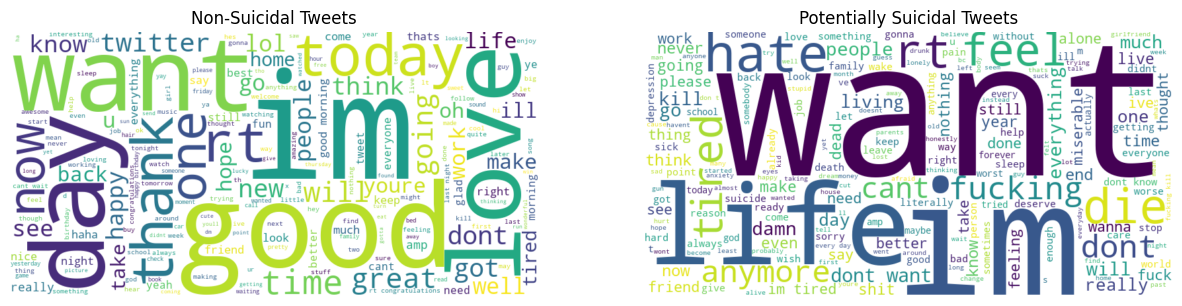

In [8]:
%pip install wordcloud

from wordcloud import WordCloud # type: ignore

import matplotlib.pyplot as plt

# Separate the tweets into two categories
non_suicidal_tweets = data_cleaned[data_cleaned['Suicide'] == 'not suicide post']['Tweet']
potentially_suicidal_tweets = data_cleaned[data_cleaned['Suicide'] == 'potential suicide post']['Tweet']

# Generate word clouds
non_suicidal_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_suicidal_tweets))
potentially_suicidal_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(potentially_suicidal_tweets))

# Plot the word clouds
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(non_suicidal_wordcloud, interpolation='bilinear')
plt.title('Non-Suicidal Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(potentially_suicidal_wordcloud, interpolation='bilinear')
plt.title('Potentially Suicidal Tweets')
plt.axis('off')

plt.show()

Top 20 Common Words by Class:
         Non-suicidal  Potentially Suicidal
anymore      0.001776              0.115326
day          0.052398              0.068285
die          0.001776              0.169954
dont         0.031083              0.262519
feel         0.009769              0.125948
fucking      0.001776              0.141123
going        0.035524              0.060698
good         0.080817              0.022762
hate         0.002664              0.186646
im           0.074600              0.245827
just         0.079929              0.271624
kill         0.011545              0.110774
know         0.028419              0.094082
life         0.023091              0.189681
like         0.054174              0.186646
love         0.053286              0.033384
people       0.025755              0.088012
rt           0.059503              0.148710
tired        0.020426              0.163885
want         0.060391              0.332322


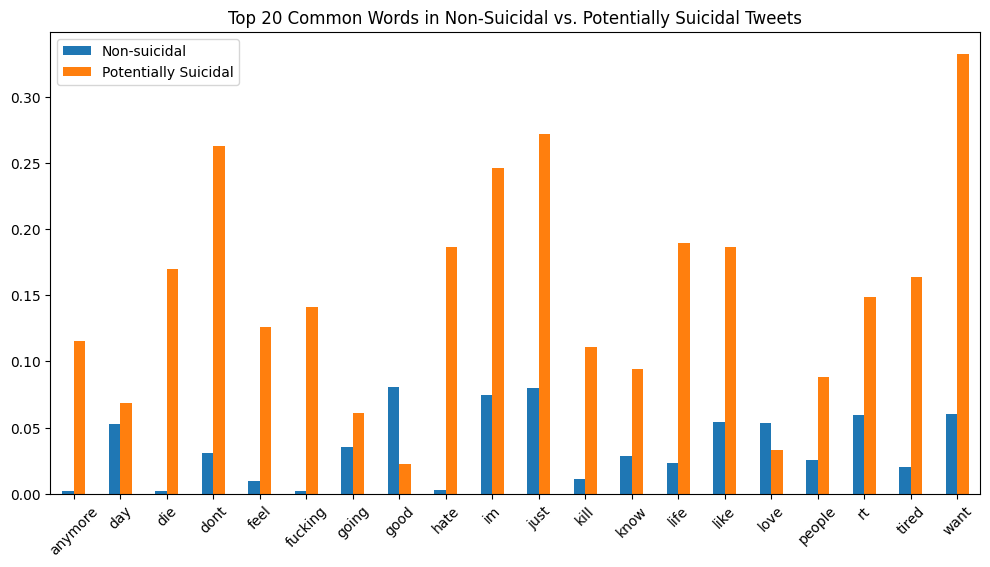

In [9]:

#analyzing most common words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=20)
word_counts = cv.fit_transform(data_cleaned['Tweet'])

word_freq = pd.DataFrame(word_counts.toarray(), columns=cv.get_feature_names_out())
word_freq['Suicide'] = data_cleaned['Suicide']

word_stats = word_freq.groupby('Suicide').mean().T
word_stats.columns = ['Non-suicidal', 'Potentially Suicidal']
print("Top 20 Common Words by Class:")
print(word_stats)

word_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Top 20 Common Words in Non-Suicidal vs. Potentially Suicidal Tweets')
plt.xticks(rotation = 45)
plt.show()



  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.
Sentiment               negative  neutral  positive
Suicide                                            
not suicide post             133      382       611
potential suicide post       544       52        63


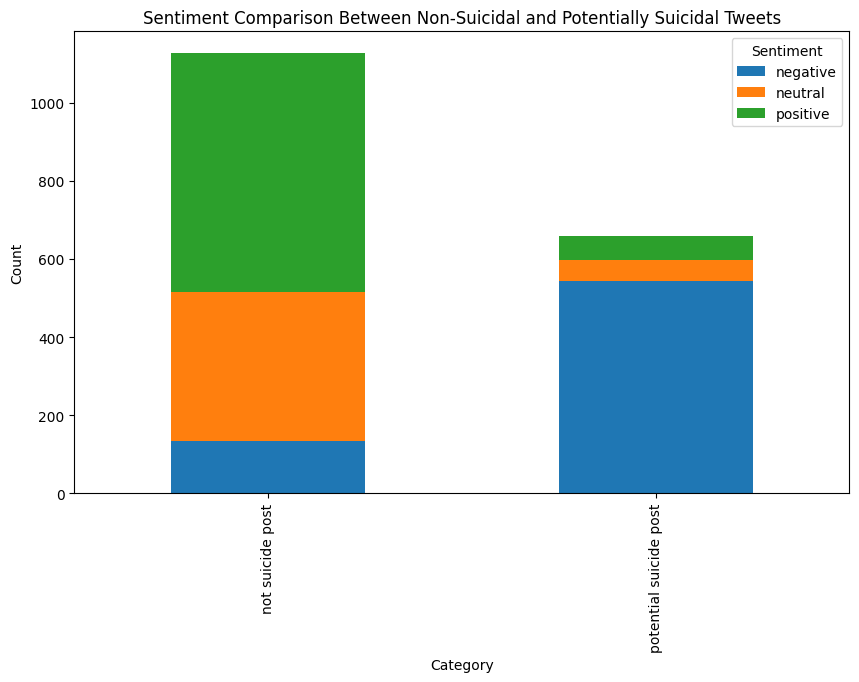

In [11]:

%pip install textblob


from textblob import TextBlob
# sentiment analysis
# Ensure the analyze_sentiment function is defined
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'


# Perform sentiment analysis on the tweets
data_cleaned['Sentiment'] = data_cleaned['Tweet'].apply(analyze_sentiment)

# Compare sentiment distribution between the two categories
sentiment_comparison = data_cleaned.groupby(['Suicide', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_comparison)

# Plot the sentiment comparison
sentiment_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Comparison Between Non-Suicidal and Potentially Suicidal Tweets')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()